# Training Code with Real 1 sceond audio file. Calculate spectrogram and train CNN

In [3]:
import os
import librosa # type: ignore
import librosa.display # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
from IPython.display import Audio  # type: ignore
from scipy.fft import fft, fftfreq # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.metrics import accuracy_score, f1_score, classification_report , confusion_matrix, ConfusionMatrixDisplay # type: ignore
import seaborn as sns  # type: ignore
import pickle
from scipy.signal import butter, lfilter # type: ignore
import noisereduce as nr # type: ignore
from scipy.io import wavfile # type: ignore
import datetime

In [4]:
# Load the Drone audio file
audio_file = './dataset/train/Drone/Drone_0.wav'  # Replace with your audio file path
y, fs = librosa.load(audio_file)  # , duration=20)
timesDuration = librosa.get_duration(y=y, sr=fs)

# normalize audio  
max_value = np.max(np.abs(y))       # Determine the maximum values
audio_Drone = y/max_value           # Use max_value and normalize sound data to get values between -1 & +1

print(f'Sampling Rate: {fs} Hz')
print(f'Audio Duration: {timesDuration:.0f} seconds')

Sampling Rate: 22050 Hz
Audio Duration: 1 seconds


In [5]:
Audio(data=audio_Drone, rate=fs)

In [6]:
# Calculate Spectrogram by using SFTF method
def spectrogram_cal(data,fs):
    ms = librosa.feature.melspectrogram(y=data, sr=fs, n_fft=2048, hop_length=128, n_mels=256)
    spectrogram_db = librosa.power_to_db(ms, ref=np.max)

    # n_fft = 1024       # Length of FFT window
    # hop_length = 64   # Number of samples between frames
    # win_length = 1024  # Length of the window
    # window = 'hann'    # Windowing function

    # # Compute the STFT
    # spectrogram = librosa.stft(data, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window)
    # spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram))  # Convert to dB
    
    return spectrogram_db

# FFT Calcutor Function
1-D discrete Fourier transforms 

In [7]:
# ----- 1-D discrete Fourier transforms ------
def audioFFT_cal (data,fs):
    N = int(fs * timesDuration)         #   Number of sample points

    #yf = fft(audio_DroneFilter)
    #xf = fftfreq(N, 1 / fs)

    T = 1.0 / (fs)   # sample spacing
    x = np.linspace(0.0, N*T, N, endpoint=False)
    yf = fft(data)
    Xf = fftfreq(N, T)[:N//2]
    FFT_Amplitude = 10*np.log(np.abs(yf[0:N//2]))
    #20*np.log10(np.abs(h))
    #max_freq = np.argmax(N * np.abs(yf[0:N//2]))
    #print("High Amplitude Frequency :", max_freq)
    
    return Xf,FFT_Amplitude

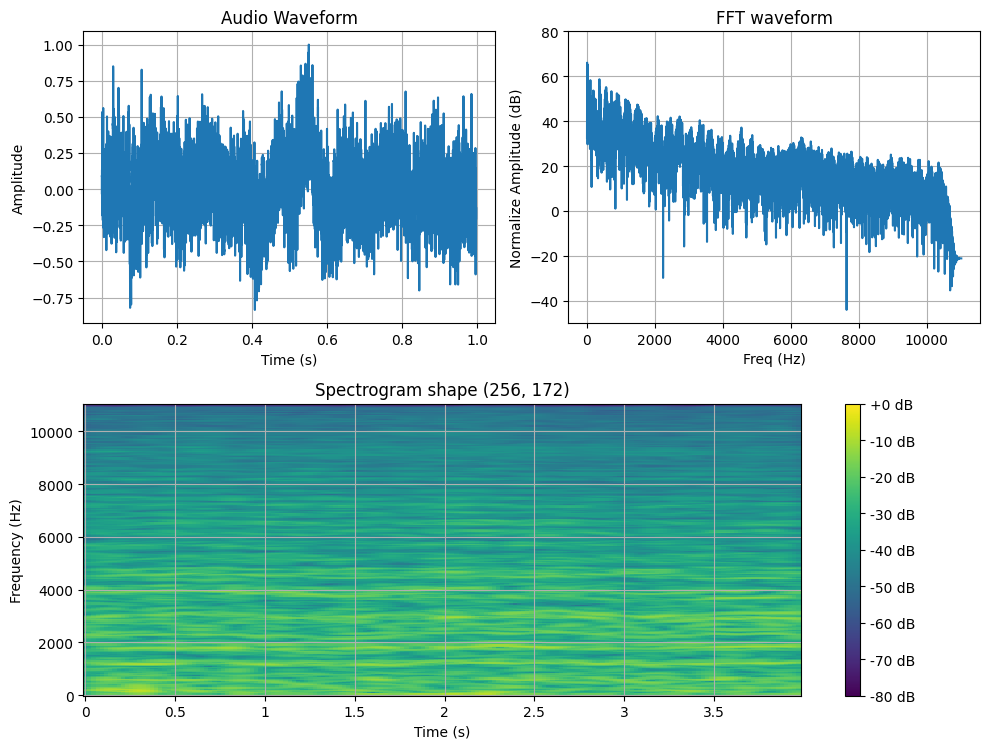

In [8]:
y_signal = audio_Drone

plt.figure(figsize=(10, 8))
# ----- Plot Audio Waveform  -----
plt.subplot(2, 2, 1)
plt.title(f'Audio Waveform')
plt.plot(np.linspace(0, len(y_signal) / fs, len(y_signal)), y_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
# ----- Plot FFT  -----
xf,yf = audioFFT_cal(y_signal,fs)    
plt.subplot(2, 2, 2)
plt.title(f'FFT waveform')
plt.plot(xf, yf)
plt.grid()
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalize Amplitude (dB)')
plt.ylim(-50,80)

# ------- Plot Spectrogram ---------
spectrogram_db = spectrogram_cal(y_signal,fs)
plt.subplot(2, 1, 2)
plt.title(f'Spectrogram')
librosa.display.specshow(spectrogram_db, sr=fs, x_axis='time', y_axis='linear', cmap='viridis')
#cmap = 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spectrogram shape {spectrogram_db.shape}')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Data Pre-Processing

In [9]:
# Set the path to dataset folder
print("#: Set the path to dataset folder")
data_dir = "./dataset/train"

# parameter config
labels = ['Drone','No_Drone']
spectrogram_input = []
target_labels = []

for label in labels:
    label_dir = os.path.join(data_dir, label)
    for audio_file in os.listdir(label_dir):
        audio_path = os.path.join(label_dir, audio_file)
        print(audio_path)
        
        # Import Audio File
        audio_original, sr = librosa.load(audio_path)  # Load audio and limit to 3 seconds

        # normalize audio  
        max_value = np.max(np.abs(audio_original))       # Determine the maximum values
        audio_normalize = audio_original/max_value        # Use max_value and normalize sound data to get values between -1 & +1

        spectrogram = spectrogram_cal(audio_normalize,fs)
        
        # Transpose the spectrogram to have the shape (timesteps, n_mels)
        spectrogram_input.append(spectrogram)
        target_labels.append(label)

#: Set the path to dataset folder
./dataset/train/Drone/Drone_796.wav
./dataset/train/Drone/Drone_782.wav
./dataset/train/Drone/Drone_972.wav
./dataset/train/Drone/Drone_966.wav
./dataset/train/Drone/Drone_1017.wav
./dataset/train/Drone/Drone_755.wav
./dataset/train/Drone/Drone_741.wav
./dataset/train/Drone/Drone_999.wav
./dataset/train/Drone/Drone_1003.wav
./dataset/train/Drone/Drone_769.wav
./dataset/train/Drone/Drone_594.wav
./dataset/train/Drone/Drone_580.wav
./dataset/train/Drone/Drone_231.wav
./dataset/train/Drone/Drone_557.wav
./dataset/train/Drone/Drone_543.wav
./dataset/train/Drone/Drone_225.wav
./dataset/train/Drone/Drone_219.wav
./dataset/train/Drone/Drone_386.wav
./dataset/train/Drone/Drone_392.wav
./dataset/train/Drone/Drone_345.wav
./dataset/train/Drone/Drone_423.wav
./dataset/train/Drone/Drone_437.wav
./dataset/train/Drone/Drone_351.wav
./dataset/train/Drone/Drone_379.wav
./dataset/train/Drone/Drone_27.wav
./dataset/train/Drone/Drone_33.wav
./dataset/train/Drone/Drone_18

# Encoding targets 

In [10]:
# Support Python 3.9 only
from tensorflow.keras.utils import to_categorical # type: ignore
from sklearn.preprocessing import LabelEncoder # type: ignore

print("#: Encoding targets and data-splitting")
print("labels : " + str(labels))

# Encode target labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(target_labels)
Y_label = to_categorical(encoded_labels)
print(f'Example Label : {Y_label[0]}')

/Users/panya/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


#: Encoding targets and data-splitting
labels : ['Drone', 'No_Drone']
Example Label : [1. 0.]


# Split data into train and test sets
Convert input data to ndarray and split data to train and test Model

In [11]:
X = np.array(spectrogram_input)
y = np.array(Y_label)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

xtrain, xtest, ytrain, ytest = train_test_split(X,y, train_size =0.8, random_state=42 )

# Normalize the data
xtrain = xtrain / 255.0
xtest = xtest / 255.0

print("xtrain shape : " + str(xtrain.shape))
print("xtest shape : " + str(xtest.shape))
print("ytrain shape : " + str(ytrain.shape))
print("ytest shape : " + str(ytest.shape))

######## Exploratory data analysis #######
# Count the number of samples in each class
print()
print("#: Count the number of samples in each class")
class_counts = [len(os.listdir(os.path.join(data_dir, label))) for label in labels]

print("Total Data set: " + str(int(class_counts[0]) + int(class_counts[1])))
print(labels[0] + ": " + str(class_counts[0]))
print(labels[1] + ": " + str(class_counts[1]))
print()

print("Data set for Train: " + str(xtrain.shape[0]))
print("Data set for Test: " + str(xtest.shape[0]))

xtrain shape : (1388, 256, 172, 1)
xtest shape : (347, 256, 172, 1)
ytrain shape : (1388, 2)
ytest shape : (347, 2)

#: Count the number of samples in each class
Total Data set: 1735
Drone: 1018
No_Drone: 717

Data set for Train: 1388
Data set for Test: 347


# Model training

In [12]:
import tensorflow as tf
import keras

# Create the convolutional base
model = keras.Sequential([
        keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=xtrain.shape[1:]),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128,(3,3) , activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2 )),
        keras.layers.Dense(16),
        keras.layers.Dense(8),
        keras.layers.Flatten(),
        keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/Users/panya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 170, 128)  │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 85, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 83, 128)   │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 41, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 62, 41, 16)     │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62, 41, 8)      │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20336)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │        40,674 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191,738 (748.98 KB)

 Trainable params: 191,738 (748.98 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
hist = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), batch_size=16, epochs=10)

Epoch 1/10
 8/87 ━━━━━━━━━━━━━━━━━━━━ 58s 746ms/step - accuracy: 0.5997 - loss: 0.7243

KeyboardInterrupt: 

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [16]:
# save the iris classification model as a pickle file
model_pkl_file = "model/" + str(datetime.datetime.now()) + ".pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

In [17]:
# load AI model from pickle file
with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)

In [ ]:
from sklearn.metrics import confusion_matrix # type: ignore
import seaborn as sns # type: ignore

y_predicted = model.predict(xtest)
mat = confusion_matrix(ytest.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['Drone', 'NoDrone']

# Calculate accuracy and F1 score
print("#: Calculate accuracy and F1 score")
accuracy = accuracy_score(ytest.argmax(axis=1), y_predicted.argmax(axis=1))

f1 = f1_score(ytest.argmax(axis=1), y_predicted.argmax(axis=1))

print(f"Accuracy: {accuracy * 100:.2f}%")
#print('Accuracy: {:.2f}'.format(accuracy))
print('F1 score: {:.2f}'.format(f1))

# Print classification report
print(classification_report(ytest.argmax(axis=1), y_predicted.argmax(axis=1), target_names=class_labels))

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.title('Confusion Matrix', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)
